In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler




# Data description 
The CSV file where each row represents an image, and columns represent pixel values and labels.

The first column could be the label (A-Z), and the remaining columns represent pixel values.

In [2]:
train_data=pd.read_csv('D:\\DeepLearning\\CodeAlpha_Project_Name\\HandWrittenCharacterRecognition\\Dataset\\A_Z Handwritten Data.csv',header=None).astype('float32')
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_data.shape

(372451, 785)

In [4]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,372451.000000,372451.0,372451.0,372451.0,372451.0,372451.0,372451.0,372451.0,372451.0,372451.0,...,372451.000000,372451.000000,372451.000000,372451.000000,372451.000000,372451.000000,372451.000000,372451.000000,372451.000000,372451.000000
mean,13.523454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419179,0.385566,0.319820,0.208941,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Columns: 785 entries, 0 to 784
dtypes: float32(785)
memory usage: 1.1 GB


In [6]:
X=train_data.drop([0],axis=1)
Y=train_data[0]

In [7]:
print(X)

        1    2    3    4    5    6    7    8    9    10   ...  775  776  777  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
372446  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
372447  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
372448  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
372449  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
372450  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        778  779  780  781  782  783  7

In [8]:
print("shape:",X.shape)
print("culoms count:",len(X.iloc[1]))

shape: (372451, 784)
culoms count: 784


In [9]:
word_dictionary={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

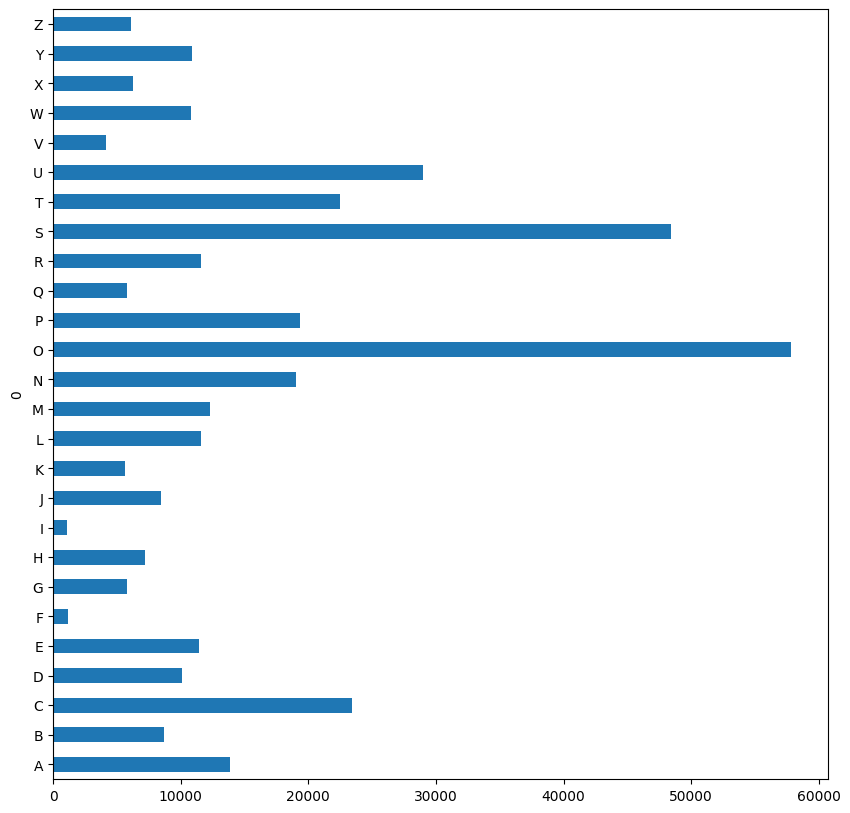

In [10]:
train_data[0] = train_data[0].map(word_dictionary)

label_size = train_data.groupby(0).size()
label_size.plot.barh(figsize=(10,10))
plt.show()


x_train and x_test are assumed to be the input data containing pixel values for images.

The reshape method is used to reshape the data into 4D arrays. The new shape is (number_of_samples, height, width, channels).

x_train.shape[0] is the number of samples in the training set.
28 and 28 are the height and width of the images (assuming 28x28 pixel images).

1 is the number of channels. In this case, it's set to 1, indicating grayscale images. 

In [11]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# scale data

standard_scaler = MinMaxScaler()
standard_scaler.fit(x_train)

x_train = standard_scaler.transform(x_train)
x_test = standard_scaler.transform(x_test)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

y_train = to_categorical(y_train,num_classes=26,dtype='int')
y_test = to_categorical(y_test,num_classes=26,dtype='int')

In [12]:
x_train.shape


(297960, 28, 28, 1)

In [13]:
x_test.shape

(74491, 28, 28, 1)

### shuffle the features then plot the result the reshaped data after transformation

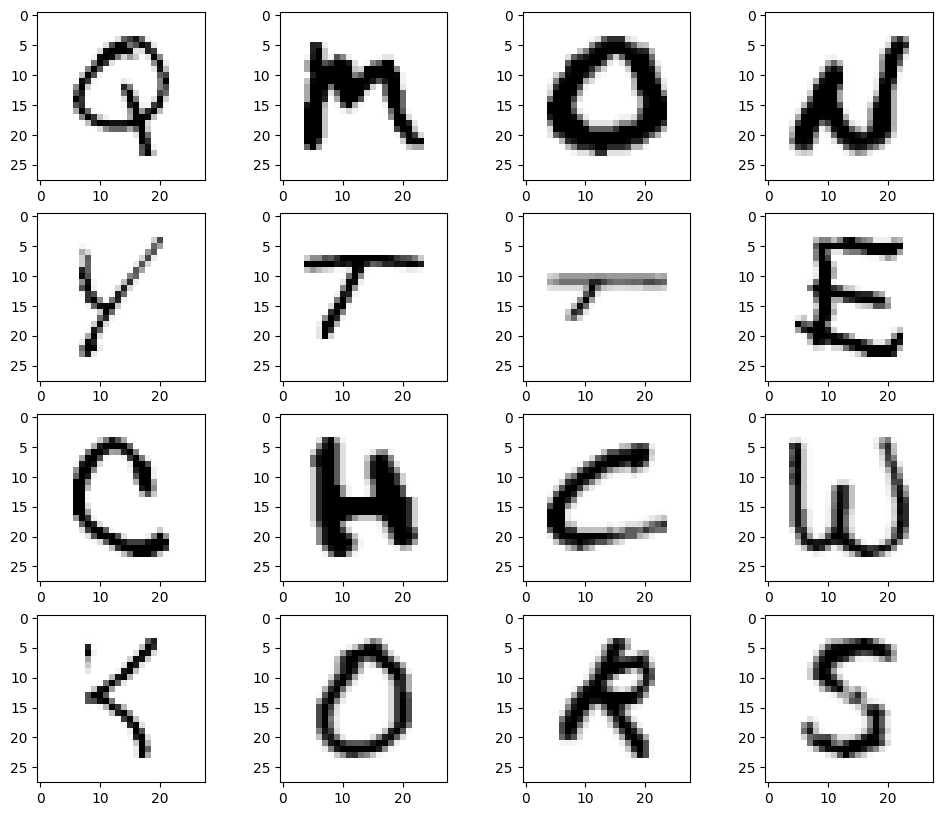

In [14]:
from sklearn.utils import shuffle

X_shuffle = shuffle(x_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

### Build neural network with convolutional layers 

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPool2D,Dropout

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Dropout(0.5))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Dropout(0.5))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(26,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20,)

scores = model.evaluate(x_test,y_test, verbose=0)
print("CNN Score:",scores[1])






Epoch 1/20


9312/9312 [==============================] - 93s 10ms/step - loss: 0.3507 - accuracy: 0.8959 - val_loss: 0.1154 - val_accuracy: 0.9664
Epoch 2/20
9312/9312 [==============================] - 95s 10ms/step - loss: 0.1808 - accuracy: 0.9463 - val_loss: 0.0896 - val_accuracy: 0.9740
Epoch 3/20
9312/9312 [==============================] - 101s 11ms/step - loss: 0.1566 - accuracy: 0.9535 - val_loss: 0.0789 - val_accuracy: 0.9773
Epoch 4/20
9312/9312 [==============================] - 91s 10ms/step - loss: 0.1432 - accuracy: 0.9574 - val_loss: 0.0771 - val_accuracy: 0.9778
Epoch 5/20
9312/9312 [==============================] - 103s 11ms/step - loss: 0.1370 - accuracy: 0.9591 - val_loss: 0.0760 - val_accuracy: 0.9778
Epoch 6/20
9312/9312 [==============================] - 109s 12ms/step - loss: 0.1315 - accuracy: 0.9607 - val_loss: 0.0727 - val_accuracy: 0.9781
Epoch 7/20
9312/9312 [==============================] - 135s 15ms/step - loss: 0.1277 - accuracy: 0.9618 - val_loss:

### A simple OCR pipeline using Tesseract to recognize text in an image

In [ ]:
from PIL import Image
import cv2
import pytesseract

# Configure the path to the Tesseract executable (replace 'your_path_to_tesseract' with the actual path)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def preprocess_test_data(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to match model input size
    
    # Convert to numpy array and normalize pixel values
    img_array = np.array(img) / 255.0
    
    # Reshape the data to match the model input shape
    img_array = img_array.reshape(1, 28, 28, 1)
    
    return img_array

# Load the word image
word_image_path = 'D:\\DeepLearning\\CodeAlpha_Project_Name\\HandWrittenCharacterRecognition\\Dataset\\test2.png'
word_image = cv2.imread(word_image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(word_image, cv2.COLOR_BGR2GRAY)

# Use pytesseract to perform OCR and extract text from the image
extracted_text = pytesseract.image_to_string(gray)

# Preprocess the extracted text (adjust as needed)
preprocessed_text = extracted_text.upper().strip()

# Now, preprocessed_text contains the recognized text from the image
print("Recognized Text:", preprocessed_text)


Recognized Text: THE QUICK BROWN FOX J
